 1. Натрейнити

In [1]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('car_evaluation.csv', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
data_encoded = encoder.fit_transform(data)
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']
y = y-1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

AUC: 0.9982926533490626
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
           1       0.99      0.90      0.94        83
           2       0.93      0.82      0.87        17
           3       0.62      0.91      0.74        11

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.89       346
weighted avg       0.97      0.97      0.97       346

Confusion Matrix:


<Axes: >

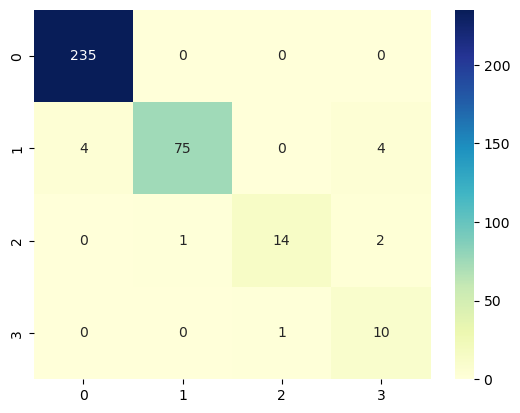

In [4]:
y_prob = rf_classifier.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("AUC:", auc)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
confusion = pd.DataFrame(data=confusion_mat)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')


2. Зробити буст попередньої моделі XGBoost

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [6]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_xgb_pred = xgb_classifier.predict(X_test)

AUC for XGBoost: 0.9993630179513603
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      0.95      0.97        83
           2       1.00      0.82      0.90        17
           3       0.65      1.00      0.79        11

    accuracy                           0.98       346
   macro avg       0.91      0.94      0.91       346
weighted avg       0.99      0.98      0.98       346

Confusion Matrix:


<Axes: >

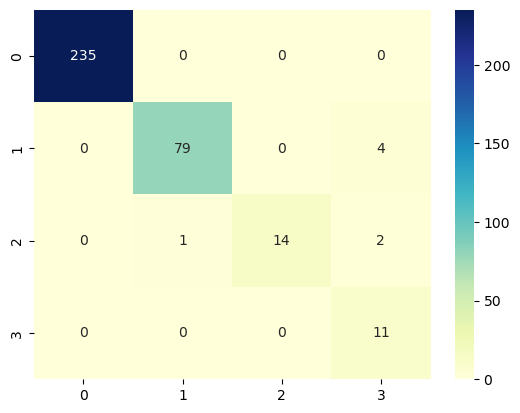

In [7]:
y_xgb_prob = xgb_classifier.predict_proba(X_test)
auc_xgb = roc_auc_score(y_test, y_xgb_prob, multi_class='ovr')
print("AUC for XGBoost:", auc_xgb)

class_report_xgb = classification_report(y_test, y_xgb_pred)
print("Classification Report for XGBoost:")
print(class_report_xgb)

confusion_mat = confusion_matrix(y_test, y_xgb_pred)
print("Confusion Matrix:")
confusion = pd.DataFrame(data=confusion_mat)
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')